In [76]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [77]:
train = pd.read_csv('Data/capstone_train.csv')
train.sample(5)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
52765,10052766,"6,000",2 years,Mortgage,33200.0,not verified,debt_consolidation,10.52,0,17.0,9,13,Male,2
59963,10059964,"28,775",2 years,Mortgage,97000.0,VERIFIED - income source,debt_consolidation,5.78,1,6.0,15,41,Male,3
32271,10032272,"25,000",6 years,Rent,70000.0,VERIFIED - income,credit_card,17.55,0,75.0,8,17,Male,3
59333,10059334,"26,000",10+ years,Mortgage,100000.0,VERIFIED - income,debt_consolidation,10.94,0,75.0,10,36,Male,2
90785,10090786,"12,000",10+ years,Rent,65000.0,not verified,credit_card,10.25,0,16.0,6,21,Female,2


In [78]:
def lar(x):
    return int(x.replace(',',''))
train['Loan_Amount_Requested'] = train['Loan_Amount_Requested'].apply(lar)

In [79]:
train.drop('Loan_ID',axis = 1,inplace = True)

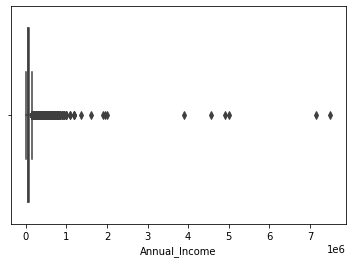

In [80]:
sns.boxplot(train['Annual_Income'])
plt.show()
#Let us apply some capping

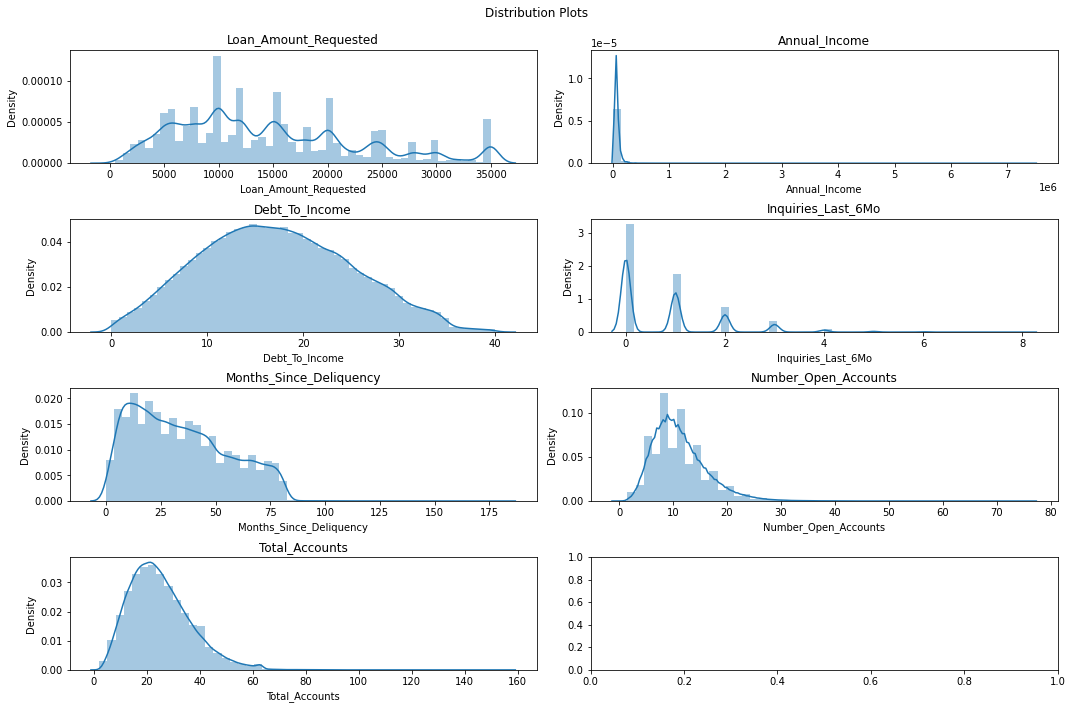

In [81]:
dist_data = train.select_dtypes(np.number).drop('Interest_Rate',axis = 1)
fig,ax = plt.subplots(4,2,figsize = (15,10))
for variables,plotsubs in zip(dist_data.columns,ax.flatten()):
    plotsubs.set_title(variables)
    sns.distplot(dist_data[variables],ax = plotsubs)
    plt.tight_layout()
    plt.subplots_adjust(top = 0.92)
fig.suptitle('Distribution Plots')
plt.show()

###### First perform wisorization and then apply capping

In [82]:
def capping(col_name):
    Q1 = train[col_name].quantile(0.25)
    Q3 = train[col_name].quantile(0.75)
    IQR = Q3-Q1
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    train[col_name][train[col_name]>upper]=train[col_name].quantile(0.99)

In [83]:
for i in train.select_dtypes(np.number).drop('Interest_Rate',axis = 1):
    capping(i)

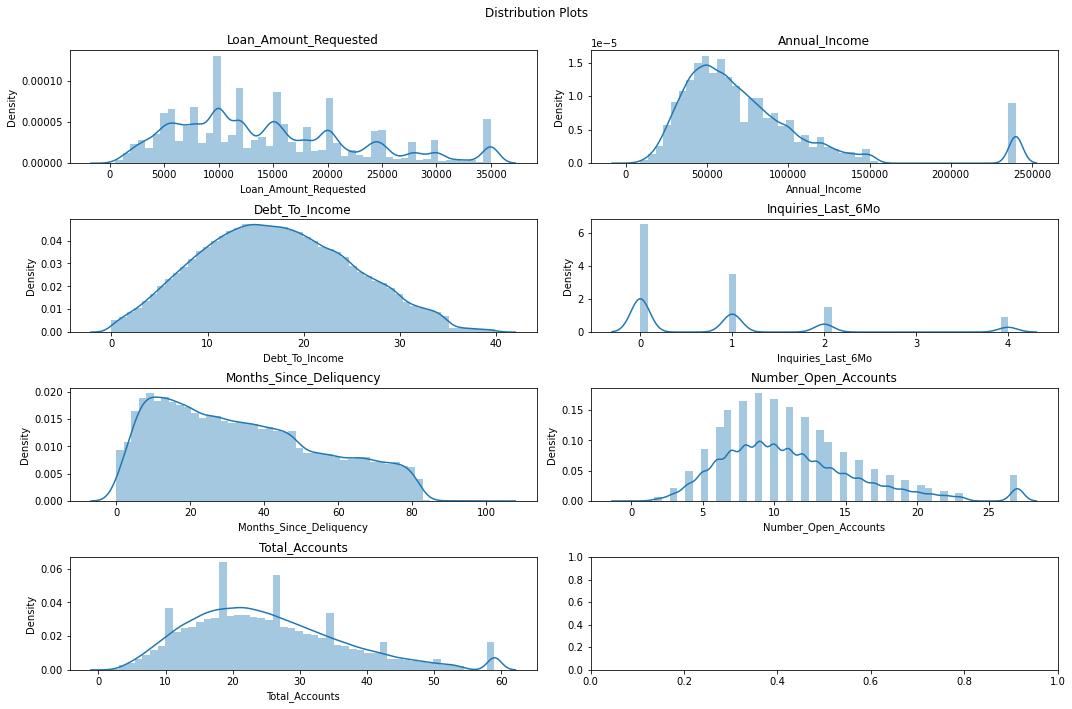

In [50]:
dist_data = train.select_dtypes(np.number).drop('Interest_Rate',axis = 1)
fig,ax = plt.subplots(4,2,figsize = (15,10))
for variables,plotsubs in zip(dist_data.columns,ax.flatten()):
    plotsubs.set_title(variables)
    sns.distplot(dist_data[variables],ax = plotsubs)
    plt.tight_layout()
    plt.subplots_adjust(top = 0.92)
fig.suptitle('Distribution Plots')
plt.show()
#Nature of data has not changed much even after capping so that is good.

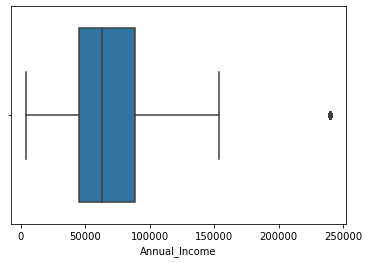

In [54]:
sns.boxplot(train['Annual_Income'])
plt.show()

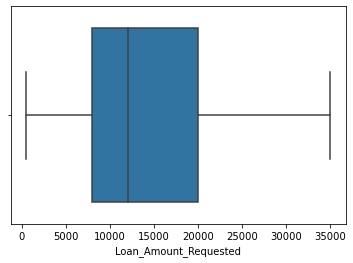

In [55]:
sns.boxplot(train['Loan_Amount_Requested'])

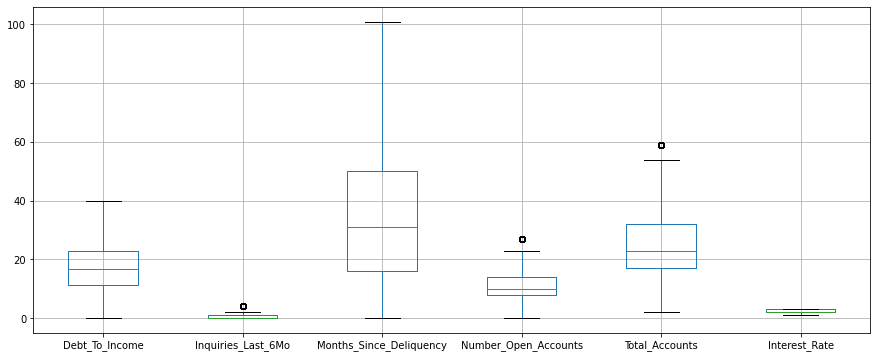

In [69]:
plt.figure(figsize = (15,6))
train.drop(['Annual_Income','Loan_Amount_Requested'],axis = 1).boxplot()
plt.show()

In [70]:
#All outliers have been treated

In [71]:
#Treating the missing values

In [72]:
train.isna().sum()[train.isna().sum()>0]/len(train)

Length_Employed            0.044861
Home_Owner                 0.154276
Annual_Income              0.152773
Months_Since_Deliquency    0.537883
dtype: float64

In [89]:
train['Months_Since_Deliquency'] = train['Months_Since_Deliquency'].fillna(0)

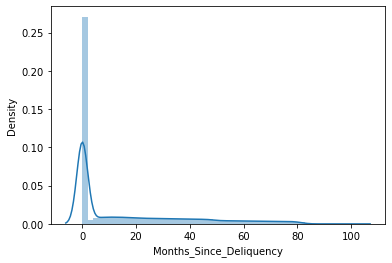

In [90]:
sns.distplot(train['Months_Since_Deliquency'])
plt.show()

In [15]:
train.isna().sum()[train.isna().sum()>0]/len(train)

Length_Employed    0.044861
Home_Owner         0.154276
Annual_Income      0.152773
dtype: float64

In [16]:
train['Income_Verified'] = train['Income_Verified'].replace('VERIFIED - income source','VERIFIED - income')

In [17]:
#Map to convert from categorical to numerical
cat_cols = train.select_dtypes('object').columns
cat_cols_map = {}
for i in train.select_dtypes('object').columns:
    temp = train[i].dropna().unique()
    d = dict(zip(temp,list(range(len(temp)))))
    cat_cols_map.setdefault(i,d)

#To convert back to categorical
rev_cat_col_map = {}
for i in train.select_dtypes('object').columns:
    temp = train[i].dropna().unique()
    d = dict(zip(list(range(len(temp))),temp))
    rev_cat_col_map.setdefault(i,d)

In [26]:
data1 = train.copy()
for i in cat_cols:
    data1[i] = data1[i].map(cat_cols_map[i])

In [27]:
data1.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000,0.0,0.0,68000.0,0,0,18.37,0,0.0,9,14,0,1
1,30000,1.0,1.0,NaN,1,1,14.93,0,17.0,12,24,0,3
2,24725,2.0,1.0,75566.4,1,1,15.88,0,0.0,12,16,1,3
3,16000,0.0,NaN,56160.0,1,1,14.34,4,0.0,16,22,1,3
4,17000,3.0,2.0,96000.0,1,1,22.17,1,0.0,19,30,0,1


In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = data1.drop('Interest_Rate',axis = 1)
y = data1['Interest_Rate']
X_scaled = pd.DataFrame(ss.fit_transform(X),columns = X.columns)
X_scaled.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,-0.887404,-1.798817,-1.090347,-0.129034,-1.472252,-1.093340,0.148290,-0.728327,-0.700993,-0.443978,-0.963498,-1.576728
1,1.889756,-1.435297,0.494832,NaN,0.679232,-0.522863,-0.290258,-0.728327,0.052748,0.165807,-0.090353,-1.576728
2,1.252820,-1.071778,0.494832,0.038509,0.679232,-0.522863,-0.169147,-0.728327,-0.700993,0.165807,-0.788869,0.634225
3,0.199311,-1.798817,NaN,-0.391208,0.679232,-0.522863,-0.365474,2.797387,-0.700993,0.978852,-0.264982,0.634225
4,0.320057,-0.708258,2.080011,0.490971,0.679232,-0.522863,0.632732,0.153102,-0.700993,1.588637,0.433534,-1.576728


In [29]:
import time
start = time.time()
from sklearn.impute import KNNImputer
knn_imp = KNNImputer()
data1 = knn_imp.fit_transform(X_scaled)
end = time.time()
print('Exec Time:',end-start)

Exec Time: -1098.8572473526


In [30]:
data1 = pd.DataFrame(ss.inverse_transform(data1),columns = X.columns).apply(round)
data1.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,7000.0,0.0,0.0,68000.0,0.0,0.0,18.0,0.0,0.0,9.0,14.0,0.0
1,30000.0,1.0,1.0,95460.0,1.0,1.0,15.0,0.0,17.0,12.0,24.0,0.0
2,24725.0,2.0,1.0,75566.0,1.0,1.0,16.0,0.0,0.0,12.0,16.0,1.0
3,16000.0,0.0,1.0,56160.0,1.0,1.0,14.0,4.0,0.0,16.0,22.0,1.0
4,17000.0,3.0,2.0,96000.0,1.0,1.0,22.0,1.0,0.0,19.0,30.0,0.0


In [31]:
for i in cat_cols:
    data1[i] = data1[i].map(rev_cat_col_map[i])

In [95]:
data1.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,7000.0,< 1 year,Rent,68000.0,not verified,car,18.0,0.0,0.0,9.0,14.0,Female
1,30000.0,4 years,Mortgage,95460.0,VERIFIED - income,debt_consolidation,15.0,0.0,17.0,12.0,24.0,Female
2,24725.0,7 years,Mortgage,75566.0,VERIFIED - income,debt_consolidation,16.0,0.0,0.0,12.0,16.0,Male
3,16000.0,< 1 year,Mortgage,56160.0,VERIFIED - income,debt_consolidation,14.0,4.0,0.0,16.0,22.0,Male
4,17000.0,8 years,Own,96000.0,VERIFIED - income,debt_consolidation,22.0,1.0,0.0,19.0,30.0,Female


In [96]:
pd.concat((data1,train['Interest_Rate']),axis = 1).to_csv('Data/Train_24-03.csv',index = False)

# We will now load the saved dataframe

In [169]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [170]:
train = pd.read_csv('Data/Train_24-03.csv')
train.head(5)

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000.0,< 1 year,Rent,68000.0,not verified,car,18.0,0.0,0.0,9.0,14.0,Female,1
1,30000.0,4 years,Mortgage,95460.0,VERIFIED - income,debt_consolidation,15.0,0.0,17.0,12.0,24.0,Female,3
2,24725.0,7 years,Mortgage,75566.0,VERIFIED - income,debt_consolidation,16.0,0.0,0.0,12.0,16.0,Male,3
3,16000.0,< 1 year,Mortgage,56160.0,VERIFIED - income,debt_consolidation,14.0,4.0,0.0,16.0,22.0,Male,3
4,17000.0,8 years,Own,96000.0,VERIFIED - income,debt_consolidation,22.0,1.0,0.0,19.0,30.0,Female,1


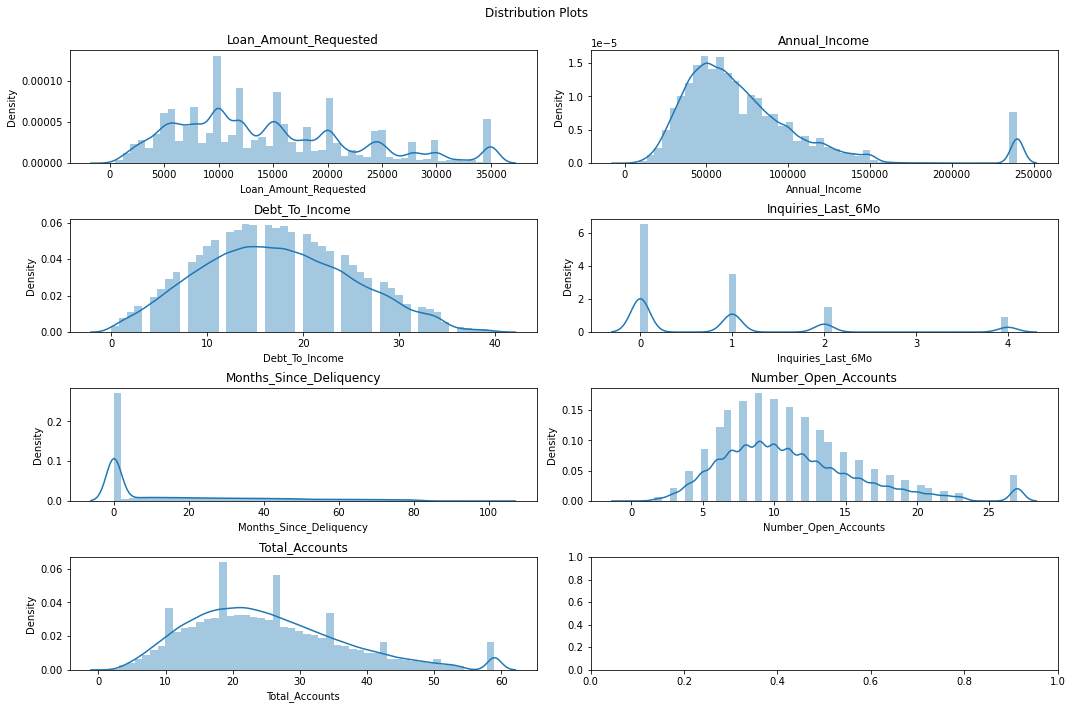

In [51]:
dist_data = train.select_dtypes(np.number).drop('Interest_Rate',axis = 1)
fig,ax = plt.subplots(4,2,figsize = (15,10))
for variables,plotsubs in zip(dist_data.columns,ax.flatten()):
    plotsubs.set_title(variables)
    sns.distplot(dist_data[variables],ax = plotsubs)
    plt.tight_layout()
    plt.subplots_adjust(top = 0.92)
fig.suptitle('Distribution Plots')
plt.show()

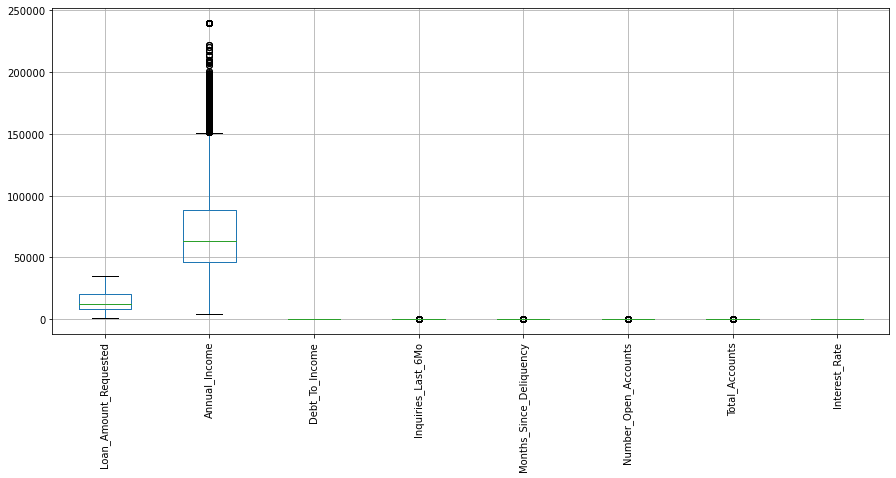

In [52]:
plt.figure(figsize = (15,6))
train.boxplot()
plt.xticks(rotation = 90)
plt.show()

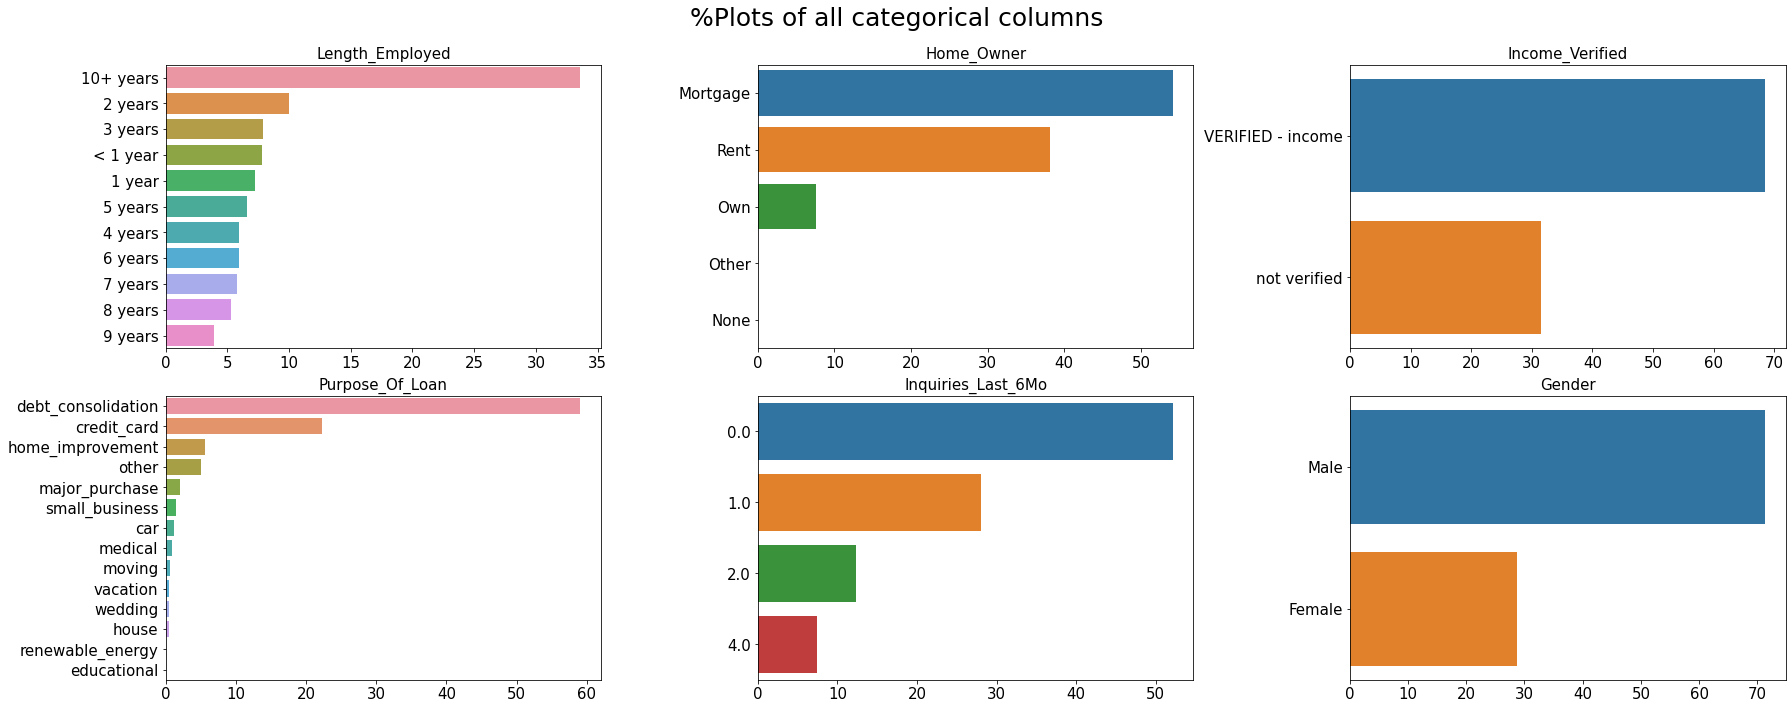

In [53]:
fig,ax = plt.subplots(nrows = 2,ncols=3,figsize = (25,10))
train['Inquiries_Last_6Mo'] = train['Inquiries_Last_6Mo'].astype('object') #Converting to object to get % count

for variables,plotsubs in zip(train.select_dtypes('object'),ax.flatten()):
    counts_index,counts_values = train[variables].value_counts().index,train[variables].value_counts().values/len(train)*100
    plotsubs.tick_params(labelsize = 15)
    plotsubs.set_title(variables,fontsize = 15)
    sns.barplot(counts_values,counts_index,ax = plotsubs,orient = 'h')
    plt.tight_layout()
    plt.subplots_adjust(top = 0.90)
    
fig.suptitle('%Plots of all categorical columns',fontsize = 25)
plt.show()
train['Inquiries_Last_6Mo'] = train['Inquiries_Last_6Mo'].astype('float')

###### Perform Encoding and try some models on this data

In [171]:
#Replace Length Employed with the number
def len_emp(x):
    return x.strip().strip('<').strip('year').strip('years').strip().strip('+')
train['Length_Employed'] = train['Length_Employed'].apply(len_emp)

In [172]:
train['Length_Employed'] = train['Length_Employed'].replace('10','11').apply(int)

In [173]:
model_data = pd.get_dummies(train,drop_first = True)

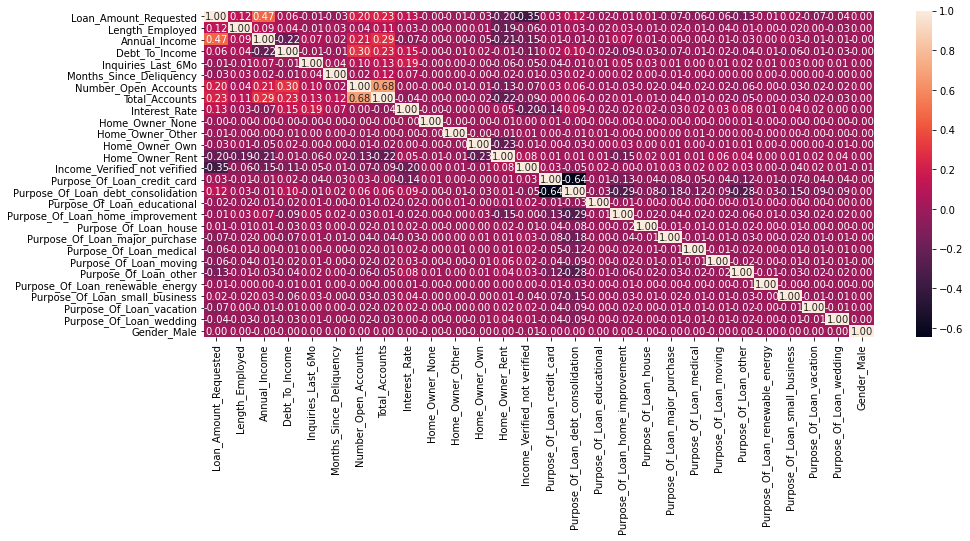

In [6]:
#Correlation Plot
plt.figure(figsize = (15,6))
sns.heatmap(model_data.corr(),annot = True,fmt = '.2f')
plt.show()

In [174]:
#Preparing the dataset
X = model_data.drop('Interest_Rate',axis = 1)
y = model_data['Interest_Rate']

#Train Test Split
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3,random_state = 12)

In [175]:
#Importing all model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

In [176]:
#Initialize all models
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4 = AdaBoostClassifier()
clf5 = GradientBoostingClassifier()
clf6 = XGBClassifier()
clf7 = CatBoostClassifier()

In [55]:
mod = [clf1,clf2,clf3,clf4,clf5,clf6,clf7]
mod_name = ['LR','DTC','RF','AdaBst','GBC','XGB','CAT']
for i,j in zip(mod,mod_name):
    scores = cross_val_score(i,X,y,scoring = 'f1_weighted',cv = 5,n_jobs = -1)
    avg_score = np.mean(scores)
    var_score = np.std(scores)/avg_score
    print(j,'Average Score (f1): ',avg_score,'Variance Error: ',var_score)

LR Average Score (f1):  0.4128952182240357 Variance Error:  0.008467919807843047
DTC Average Score (f1):  0.4265625331760017 Variance Error:  0.006226304911027541
RF Average Score (f1):  0.504614734898886 Variance Error:  0.0027516023509887248
AdaBst Average Score (f1):  0.5153755433898908 Variance Error:  0.0023151034945705635
GBC Average Score (f1):  0.5160716163443759 Variance Error:  0.0036295473576056078
XGB Average Score (f1):  0.5291491695990123 Variance Error:  0.0028035295752479573
CAT Average Score (f1):  0.5303557638826379 Variance Error:  0.0031222464241089324


### Above scores are of our base model. Now we must try to improve the above scores.

In [138]:
#Creating new features and columns
#Create a debt column from debt_to_income and Income
#Create a new columns called Number_Closed_Accounts from Total_Accounts and Number_Open_Accounts
#Bin the purpose of loan to get better generalization as a new column having assets,liabilities and other.
#Bin the months_since deliquency as good,average,poor customer based on the deliquency. This is an ordinal column. Good:2,average:1,poor:0


###### Checking for multi-colinearity in the numerical variables

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
num_cols = train.select_dtypes(np.number).drop('Interest_Rate',axis = 1)
scores_vif = []
for i in range(len(num_cols.columns)):
    scores_vif.append(vif(num_cols.values,i))

In [178]:
pd.DataFrame({'Features':num_cols.columns,'VIF':scores_vif})
#As can be seen we have high VIF fot total_accounts and number_open_accounts as expected. We will be dropping total accounts and keep open and closed accounts

,Features,VIF
0,Loan_Amount_Requested,5.338336
1,Length_Employed,3.376300
2,Annual_Income,5.399354
3,Debt_To_Income,5.547053
4,Inquiries_Last_6Mo,1.541269
5,Months_Since_Deliquency,1.490428
6,Number_Open_Accounts,11.809816
7,Total_Accounts,11.742850


In [179]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
num_cols = train.select_dtypes(np.number).drop(['Interest_Rate','Total_Accounts','Number_Open_Accounts'],axis = 1)
scores_vif = []
for i in range(len(num_cols.columns)):
    scores_vif.append(vif(num_cols.values,i))
pd.DataFrame({'Features':num_cols.columns,'VIF':scores_vif})


,Features,VIF
0,Loan_Amount_Requested,5.271845
1,Length_Employed,3.312167
2,Annual_Income,4.600269
3,Debt_To_Income,3.662832
4,Inquiries_Last_6Mo,1.505005
5,Months_Since_Deliquency,1.453108


In [180]:
#Create a new column closed accounts and recheck VIF
train['Number_Closed_Accounts'] = train['Total_Accounts']-train['Number_Open_Accounts']

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
num_cols = train.select_dtypes(np.number).drop(['Interest_Rate'],axis = 1)
scores_vif = []
for i in range(len(num_cols.columns)):
    scores_vif.append(vif(num_cols.values,i))
pd.DataFrame({'Features':num_cols.columns,'VIF':scores_vif})

,Features,VIF
0,Loan_Amount_Requested,5.338336
1,Length_Employed,3.376300
2,Annual_Income,5.399354
3,Debt_To_Income,5.547053
4,Inquiries_Last_6Mo,1.541269
5,Months_Since_Deliquency,1.490428
6,Number_Open_Accounts,inf
7,Total_Accounts,inf
8,Number_Closed_Accounts,inf


In [182]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
num_cols = train.select_dtypes(np.number).drop(['Interest_Rate','Total_Accounts'],axis = 1)
scores_vif = []
for i in range(len(num_cols.columns)):
    scores_vif.append(vif(num_cols.values,i))
pd.DataFrame({'Features':num_cols.columns,'VIF':scores_vif})

,Features,VIF
0,Loan_Amount_Requested,5.338336
1,Length_Employed,3.376300
2,Annual_Income,5.399354
3,Debt_To_Income,5.547053
4,Inquiries_Last_6Mo,1.541269
5,Months_Since_Deliquency,1.490428
6,Number_Open_Accounts,7.467542
7,Number_Closed_Accounts,4.191487


In [183]:
train['Annual_debt'] = round(train['Debt_To_Income']*(train['Annual_Income']/12))

In [187]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
num_cols = train.select_dtypes(np.number).drop(['Interest_Rate','Total_Accounts','Debt_To_Income'],axis = 1)
scores_vif = []
for i in range(len(num_cols.columns)):
    scores_vif.append(vif(num_cols.values,i))
pd.DataFrame({'Features':num_cols.columns,'VIF':scores_vif})

,Features,VIF
0,Loan_Amount_Requested,5.185790
1,Length_Employed,3.172109
2,Annual_Income,6.716311
3,Inquiries_Last_6Mo,1.538864
4,Months_Since_Deliquency,1.488792
5,Number_Open_Accounts,6.007515
6,Number_Closed_Accounts,4.159470
7,Annual_debt,6.666862


In [188]:
# #Binning Purpose of Loan into Asset,Liability,Other
# def purp_bin(x):
#     assets = [ 'home_improvement','renewable_energy','house','educational','small_business']
#     liabilities = ['car','debt_consolidation','credit_card']
#     other = ['major_purchase', 'other', 'medical', 'moving','wedding','vacation']
#     if x in assets:
#         return 'asset'
#     elif x in liabilities:
#         return 'liability'
#     elif x in other:
#         return 'misc.'
# train['Purpose_Of_Loan'] = train['Purpose_Of_Loan'].apply(purp_bin)

In [189]:
# #Bin Months_Since_Deliquency as good,average,poor
# def deliquency(x):
#     if x>150 and x<181 or x==0:
#         return 'good'
#     elif x > 100 and x<150:
#         return 'average'
#     elif x <100 and x>50:
#         return 'poor'
#     elif x<50:
#         return 'very poor'
#     else:
#         return 'good' #This will fill the nan as good since I am assuming that they have no past records of deliquency
# train['Months_Since_Deliquency'] = train['Months_Since_Deliquency'].apply(deliquency)

In [190]:
# train['Months_Since_Deliquency'].value_counts()

In [191]:
# #We can manually convert Months_Since_Deliquency since it is an ordinal column according to me.
# deli_map = dict(zip(train['Months_Since_Deliquency'].unique(),[3,0,1,2]))
# train['Months_Since_Deliquency'] = train['Months_Since_Deliquency'].map(deli_map)

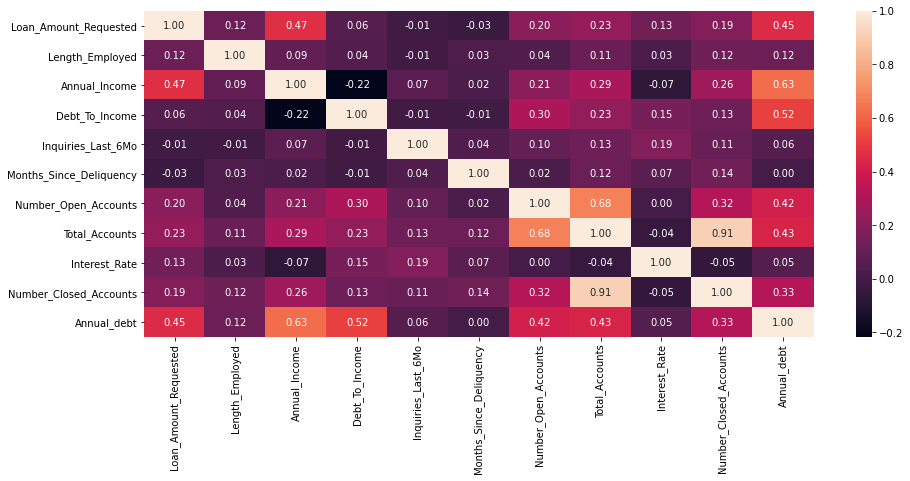

In [192]:
plt.figure(figsize = (15,6))
sns.heatmap(train.corr(),annot = True,fmt = '.2f')
plt.show()

In [193]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
num_cols = train.select_dtypes(np.number).drop(['Interest_Rate','Total_Accounts','Debt_To_Income'],axis = 1)
scores_vif = []
for i in range(len(num_cols.columns)):
    scores_vif.append(vif(num_cols.values,i))
pd.DataFrame({'Features':num_cols.columns,'VIF':scores_vif})

,Features,VIF
0,Loan_Amount_Requested,5.185790
1,Length_Employed,3.172109
2,Annual_Income,6.716311
3,Inquiries_Last_6Mo,1.538864
4,Months_Since_Deliquency,1.488792
5,Number_Open_Accounts,6.007515
6,Number_Closed_Accounts,4.159470
7,Annual_debt,6.666862


In [228]:
data1 = train.drop(['Total_Accounts','Debt_To_Income'],axis = 1)

In [229]:
#Refit all models to check if there is any improvement
model_data1 = pd.get_dummies(data1,drop_first = True)

#Preparing the dataset
X1 = model_data1.drop('Interest_Rate',axis = 1)
y1 = model_data1['Interest_Rate']

In [230]:
X1.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Number_Closed_Accounts,Annual_debt,Home_Owner_None,Home_Owner_Other,...,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Male
0,7000.0,1,68000.0,0.0,0.0,9.0,5.0,102000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30000.0,4,95460.0,0.0,17.0,12.0,12.0,119325.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,24725.0,7,75566.0,0.0,0.0,12.0,4.0,100755.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,16000.0,1,56160.0,4.0,0.0,16.0,6.0,65520.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17000.0,8,96000.0,1.0,0.0,19.0,11.0,176000.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
mod = [clf1,clf2,clf3,clf4,clf5,clf6,clf7]
mod_name = ['LR','DTC','RF','AdaBst','GBC','XGB','CAT']
for i,j in zip(mod,mod_name):
    scores = cross_val_score(i,X1,y1,scoring = 'f1_weighted',cv = 5,n_jobs = -1)
    avg_score = round(np.mean(scores),4)
    var_score = round(np.std(scores)/avg_score,4)
    print(j,'Average Score (f1): ',avg_score,'Variance Error: ',var_score)

LR Average Score (f1):  0.4206 Variance Error:  0.013
DTC Average Score (f1):  0.4289 Variance Error:  0.0039
RF Average Score (f1):  0.504 Variance Error:  0.0015
AdaBst Average Score (f1):  0.514 Variance Error:  0.0035
GBC Average Score (f1):  0.516 Variance Error:  0.0035
XGB Average Score (f1):  0.5285 Variance Error:  0.0026
CAT Average Score (f1):  0.5314 Variance Error:  0.0026


###### There has been a slight improvement in all the models but this increment is negligible.

In [232]:
#Previously Inquired vs Previously not Inquired
train.groupby(['Inquiries_Last_6Mo'])['Interest_Rate'].mean()

Inquiries_Last_6Mo
0.0    2.028425
1.0    2.239456
2.0    2.354831
4.0    2.443793
Name: Interest_Rate, dtype: float64

In [233]:
avg_purp_int = data1.groupby(['Purpose_Of_Loan'])['Interest_Rate'].mean()

In [234]:
#Target Encoding
data1['Purpose_Of_Loan'] = data1['Purpose_Of_Loan'].map(dict(zip(avg_purp_int.index,avg_purp_int.values)))

In [236]:
data1.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Gender,Interest_Rate,Number_Closed_Accounts,Annual_debt
0,7000.0,1,Rent,68000.0,not verified,1.881167,0.0,0.0,9.0,Female,1,5.0,102000.0
1,30000.0,4,Mortgage,95460.0,VERIFIED - income,2.211501,0.0,17.0,12.0,Female,3,12.0,119325.0
2,24725.0,7,Mortgage,75566.0,VERIFIED - income,2.211501,0.0,0.0,12.0,Male,3,4.0,100755.0
3,16000.0,1,Mortgage,56160.0,VERIFIED - income,2.211501,4.0,0.0,16.0,Male,3,6.0,65520.0
4,17000.0,8,Own,96000.0,VERIFIED - income,2.211501,1.0,0.0,19.0,Female,1,11.0,176000.0


In [239]:
#Refit all models to check if there is any improvement
model_data2 = pd.get_dummies(data1,drop_first = True)

#Preparing the dataset
X2 = model_data2.drop('Interest_Rate',axis = 1)
y2 = model_data2['Interest_Rate']

mod = [clf1,clf2,clf3,clf4,clf5,clf6,clf7]
mod_name = ['LR','DTC','RF','AdaBst','GBC','XGB','CAT']
for i,j in zip(mod,mod_name):
    scores = cross_val_score(i,X2,y2,scoring = 'f1_weighted',cv = 5,n_jobs = -1)
    avg_score = round(np.mean(scores),5)
    var_score = round(np.std(scores)/avg_score,5)
    print(j,'Average Score (f1): ',avg_score,'Variance Error: ',var_score)

LR Average Score (f1):  0.42048 Variance Error:  0.01275
DTC Average Score (f1):  0.42934 Variance Error:  0.00336
RF Average Score (f1):  0.50426 Variance Error:  0.0048
AdaBst Average Score (f1):  0.51355 Variance Error:  0.00206
GBC Average Score (f1):  0.51767 Variance Error:  0.00405
XGB Average Score (f1):  0.52956 Variance Error:  0.00172
CAT Average Score (f1):  0.53092 Variance Error:  0.00231


In [250]:
avg_ho_int = data1.groupby(['Home_Owner'])['Interest_Rate'].mean()

In [252]:
#Target Encoding
data1['Home_Owner'] = data1['Home_Owner'].map(dict(zip(avg_ho_int.index,avg_ho_int.values)))

In [254]:
#Refit all models to check if there is any improvement
model_data3 = pd.get_dummies(data1,drop_first = True)

#Preparing the dataset
X3 = model_data3.drop('Interest_Rate',axis = 1)
y3 = model_data3['Interest_Rate']

mod = [clf1,clf2,clf3,clf4,clf5,clf6,clf7]
mod_name = ['LR','DTC','RF','AdaBst','GBC','XGB','CAT']
for i,j in zip(mod,mod_name):
    scores = cross_val_score(i,X3,y3,scoring = 'f1_weighted',cv = 5,n_jobs = -1)
    avg_score = round(np.mean(scores),5)
    var_score = round(np.std(scores)/avg_score,5)
    print(j,'Average Score (f1): ',avg_score,'Variance Error: ',var_score)

LR Average Score (f1):  0.42044 Variance Error:  0.01271
DTC Average Score (f1):  0.42806 Variance Error:  0.00365
RF Average Score (f1):  0.50624 Variance Error:  0.00641
AdaBst Average Score (f1):  0.51349 Variance Error:  0.00197
GBC Average Score (f1):  0.51765 Variance Error:  0.00287
XGB Average Score (f1):  0.52993 Variance Error:  0.00377
CAT Average Score (f1):  0.53072 Variance Error:  0.00303


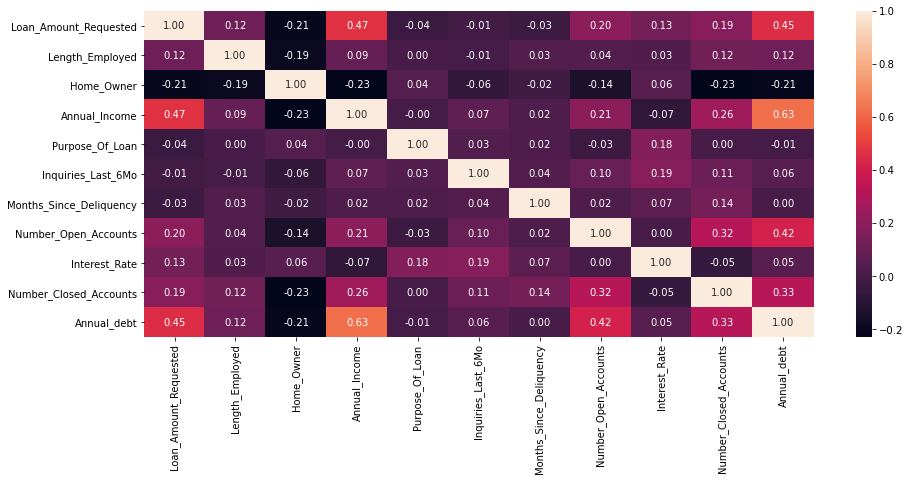

In [256]:
plt.figure(figsize = (15,6))
sns.heatmap(data1.corr(),annot = True,fmt = '.2f')
plt.show()

In [259]:
#Create a new feature Annual_Income/loan_requested. Maybe this is playing a role
data1['Annual_Income_Loan_amt_Req'] = data1['Annual_Income']/data1['Loan_Amount_Requested']

In [274]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
num_cols = data1.select_dtypes(np.number).drop(['Interest_Rate'],axis = 1)
scores_vif = []
for i in range(len(num_cols.columns)):
    scores_vif.append(vif(num_cols.values,i))
pd.DataFrame({'Features':num_cols.columns,'VIF':scores_vif})

,Features,VIF
0,Loan_Amount_Requested,9.514074
1,Length_Employed,3.769285
2,Home_Owner,256.285008
3,Annual_Income,9.456499
4,Purpose_Of_Loan,256.146240
5,Inquiries_Last_6Mo,1.569257
6,Months_Since_Deliquency,1.528500
7,Number_Open_Accounts,7.949777
8,Number_Closed_Accounts,4.224732
9,Annual_debt,6.796132


In [270]:
data2 = data1.drop('Home_Owner',axis = 1)

#Refit all models to check if there is any improvement
model_data4 = pd.get_dummies(data2,drop_first = True)

#Preparing the dataset
X4 = model_data4.drop('Interest_Rate',axis = 1)
y4 = model_data4['Interest_Rate']

mod = [clf1,clf2,clf3,clf4,clf5,clf6,clf7]
mod_name = ['LR','DTC','RF','AdaBst','GBC','XGB','CAT']
for i,j in zip(mod,mod_name):
    scores = cross_val_score(i,X4,y4,scoring = 'f1_weighted',cv = 5,n_jobs = -1)
    avg_score = round(np.mean(scores),5)
    var_score = round(np.std(scores)/avg_score,5)
    print(j,'Average Score (f1): ',avg_score,'Variance Error: ',var_score)

LR Average Score (f1):  0.42135 Variance Error:  0.00877
DTC Average Score (f1):  0.42857 Variance Error:  0.00677
RF Average Score (f1):  0.50373 Variance Error:  0.00375
AdaBst Average Score (f1):  0.51385 Variance Error:  0.00258
GBC Average Score (f1):  0.51808 Variance Error:  0.00379
XGB Average Score (f1):  0.52823 Variance Error:  0.00443
CAT Average Score (f1):  0.52927 Variance Error:  0.00348


In [276]:
data2.groupby('Interest_Rate')['Inquiries_Last_6Mo'].mean()

Interest_Rate
1    0.537863
2    0.739232
3    1.091584
Name: Inquiries_Last_6Mo, dtype: float64

In [281]:
#New column #Does customer require followups?
def followup_req(x):
    if x==1 or x==2:
        return 'Infrequent Followups'
    elif x>2:
        return 'Frequent Followups'
    else:
        return 'No Followups required'
data2['Followup_for_payment'] = data2['Inquiries_Last_6Mo'].apply(followup_req)

In [283]:
#Target Encoding
avg_ffp_int = data2.groupby(['Followup_for_payment'])['Interest_Rate'].mean()
data2['Followup_for_payment'] = data2['Followup_for_payment'].map(dict(zip(avg_ffp_int.index,avg_ffp_int.values)))

In [287]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
num_cols = data2.select_dtypes(np.number).drop(['Interest_Rate','Purpose_Of_Loan'],axis = 1)
scores_vif = []
for i in range(len(num_cols.columns)):
    scores_vif.append(vif(num_cols.values,i))
pd.DataFrame({'Features':num_cols.columns,'VIF':scores_vif})

,Features,VIF
0,Loan_Amount_Requested,9.509268
1,Length_Employed,3.783462
2,Annual_Income,9.450294
3,Inquiries_Last_6Mo,1.734280
4,Months_Since_Deliquency,1.527900
5,Number_Open_Accounts,7.975837
6,Number_Closed_Accounts,4.223428
7,Annual_debt,6.794536
8,Annual_Income_Loan_amt_Req,3.808077
9,Followup_for_payment,15.155230


In [ ]:
#Refit all models to check if there is any improvement
model_data5 = pd.get_dummies(data2,drop_first = True)

#Preparing the dataset
X5 = model_data5.drop('Interest_Rate',axis = 1)
y5 = model_data5['Interest_Rate']

mod = [clf1,clf2,clf3,clf4,clf5,clf6,clf7]
mod_name = ['LR','DTC','RF','AdaBst','GBC','XGB','CAT']
for i,j in zip(mod,mod_name):
    scores = cross_val_score(i,X5,y5,scoring = 'f1_weighted',cv = 5,n_jobs = -1)
    avg_score = round(np.mean(scores),5)
    var_score = round(np.std(scores)/avg_score,5)
    print(j,'Average Score (f1): ',avg_score,'Variance Error: ',var_score)

LR Average Score (f1):  0.42127 Variance Error:  0.00867
DTC Average Score (f1):  0.42907 Variance Error:  0.00456
